In [1]:
import requests
import missingno as msno
import matplotlib.pyplot as plt
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf
import seaborn as sns
import scipy
from scipy import stats
cf.go_offline()

import numpy as np
import pandas as pd
import math
from pandas import Series,DataFrame

import warnings
import sklearn.tree
import sklearn.metrics

from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import sys
import random

from matplotlib import pyplot as plt
import matplotlib
import seaborn as sns
sns.set(style="white", color_codes=True)
%matplotlib inline
plt.style.use('seaborn') # pretty matplotlib plots

#pip install fbprophet
import fbprophet
import os
import altair as alt
alt.renderers.enable('notebook')
#print(os.listdir("../WorksenseProject"))
from IPython.display import HTML
from fbprophet import Prophet
import heapq

In [2]:
def linearRegression(x, y, degree, department):
    #create linear regression model for all workers
    
    poly = PolynomialFeatures(degree) 
    x_T = poly.fit_transform(x)
    linearRegression = LinearRegression()
    linearRegression.fit(x_T, y)
    yPredict = linearRegression.predict(x_T)

    error = mean_squared_error(y, yPredict) / max(y)

    prediction = yPredict
    error = error
    
    plt.title('degree = %d; MSE = %.3f' % (degree, error))
    plt.plot(x, y, '.')
    plt.plot(x,  yPredict,label = '%s'%department)
    plt.legend()
    
    return poly, prediction, error

In [3]:
def plot_predictions(x, y, polynomials=list(), prediction_list=list(), error_list=list()):
    length = len(prediction_list)
    grid_size = int(math.sqrt(length))
    if not (length == len(polynomials) and length == len(error_list)):
        raise ValueError("Input lists must be of same length")
    if not length == (grid_size * grid_size):
        raise ValueError("Need a square number of list items (%d given)" % (length))
    
    fig, axs = plt.subplots(grid_size, grid_size, figsize =(14,14), sharey=True)
    for subplot_id, prediction in enumerate(prediction_list):
        data_frame = pd.DataFrame(data=[x[:, 0], prediction]).T
        data_frame = data_frame.sort_values(by=0)
        x_sorted = data_frame.iloc[:, :-1].values
        prediction_sorted = data_frame.iloc[:, 1].values

        ax = axs.flat[subplot_id]
        ax.set_title('degree = %d; MSE = %.3f' % (polynomials[subplot_id], error_list[subplot_id]))
        ax.plot(x, y, 'r.')
        ax.plot(x_sorted, prediction_sorted, color='blue')
        
    plt.show()

In [4]:
def test_polynomials(x, y, polynomials=list()):
    
    prediction_list = list()
    error_list = list()
    
    for d in polynomials:
        poly = PolynomialFeatures(degree=d) 
        x_T = poly.fit_transform(x)
        linearRegression = LinearRegression()
        linearRegression.fit(x_T, y)
        yPredict = linearRegression.predict(x_T)

        error = mean_squared_error(y, yPredict) / max(y)

        prediction_list.append(yPredict)
        error_list.append(error)

        
    #return yPredict,error
    return prediction_list, error_list


In [5]:
def linearRegression_all(x, y, degree):
    poly = PolynomialFeatures(degree) 
    x_T = poly.fit_transform(x)
    linearRegression = LinearRegression()
    linearRegression.fit(x_T, y)
    yPredict = linearRegression.predict(x_T)
    error = mean_squared_error(y, yPredict) / max(y)
    prediction = yPredict
    error = error
    
    plt.plot(x,  yPredict, 'r',label = 'All-Linear',lw = 5)
    plt.legend()
    
    return poly, prediction, error

In [6]:
def genderRegression(degree, dataframe):
    
    men = dataframe.loc[dataframe['Gender']=='Male']
    men_ave = men.groupby('Age',as_index = False)['Ave_salary'].mean()
    
    trans = dataframe.loc[dataframe['Gender']=='Transgender']
    trans_ave = trans.groupby('Age',as_index = False)['Ave_salary'].mean()
    
    women = dataframe.loc[dataframe['Gender']!='Male']
    women = women.loc[women['Gender']!='Transgender']
    women_ave = women.groupby('Age',as_index = False)['Ave_salary'].mean()
    
    x_men = age_num(men_ave)
    x_women = age_num(women_ave)
    x_trans = age_num(trans_ave)
    
    y_men = np.array(men_ave['Ave_salary'].copy())
    y_women = np.array(women_ave['Ave_salary'].copy())
    y_trans = np.array(trans_ave['Ave_salary'].copy())
    
    model_men, pre_men, error_men = linearRegression(x_men, y_men, degree, 'men')
    model_women, pre_women, error_women = linearRegression(x_women, y_women, degree, 'women')
    model_trans, pre_trans, error_trans = linearRegression(x_trans, y_trans, degree, 'transgender')
    
    x_all = age_num(dataframe)
    y_all = np.array(dataframe['Ave_salary'].copy())
    model_all, pre_all, error_all = linearRegression_all(x_all, y_all, 1)
    
    
    return model_men, pre_men, error_men, model_women, pre_women, error_women, model_trans, pre_trans, error_trans, model_all, pre_all, error_all


In [7]:
def raceRegression(degree, dataframe):
    
    white = dataframe.loc[dataframe['Race']=='White']
    white_ave = white.groupby('Age',as_index = False)['Ave_salary'].mean()
    
    black = dataframe.loc[dataframe['Race']=='Black']
    black_ave = black.groupby('Age',as_index = False)['Ave_salary'].mean()
    
    asian = dataframe.loc[dataframe['Race']=='Asian']
    asian_ave = asian.groupby('Age',as_index = False)['Ave_salary'].mean()
    
    latino = dataframe.loc[dataframe['Race']=='Latino']
    latino_ave = latino.groupby('Age',as_index = False)['Ave_salary'].mean()
    
    x_white = age_num(white_ave)
    x_black = age_num(black_ave)
    x_asian = age_num(asian_ave)
    x_latino = age_num(latino_ave)
    
    y_white = np.array(white_ave['Ave_salary'].copy())
    y_black = np.array(black_ave['Ave_salary'].copy())
    y_asian = np.array(asian_ave['Ave_salary'].copy())
    y_latino = np.array(latino_ave['Ave_salary'].copy())
    
    model_white, pre_white, error_white = linearRegression(x_white, y_white, degree, 'white')
    model_black, pre_black, error_black = linearRegression(x_black, y_black, degree, 'black')
    model_asian, pre_asian, error_asian = linearRegression(x_asian, y_asian, degree, 'asian')
    model_latino, pre_latino, error_latino = linearRegression(x_latino, y_latino, degree, 'latino')
    
    x_all = age_num(dataframe)
    y_all = np.array(dataframe['Ave_salary'].copy())
    model_all, pre_all, error_all = linearRegression_all(x_all, y_all, 1)
    
    return model_white, pre_white, error_white, model_black, pre_black, error_black, model_asian, pre_asian, error_asian, model_latino, pre_latino, error_latino, model_all, pre_all, error_all


In [8]:
def newRegression(degree, df, feature, col_labels):
    row_labels: []
    for i in range(len(col_labels)):
        row_labels[i][0] = col_labels[i]
        row_labels[i].append(df.col_labels[i].unique())
    dict_list = []
    for i in range(len(row_labels)):
        for j in row_labels[i][j]:
            cat_dict.feature = row_labels[i][0]
            cat_dict = {"feature": None, "cat": None, "cat_ave": None, "x_cat": None, "y_cat": None, "model_cat": None, "pre_cat": None, "error_cat": None}
            cat_dict.cat = dataframe.loc[dataframe[cat_dict.feature]==row_labels[i][j]]
            cat_dict.cat_ave = cat_dict.cat.groupby('Age',as_index = False)['Ave_salary'].mean()
            cat_dict.x_cat = age_num(cat_dict.cat_ave)
            cat_dict.y_cat = np.array(cat_dict.cat_ave['Ave_salary'].copy())
            cat_dict.model_cat, cat_dict.pre_cat, cat_dict.error_cat = linearRegression(cat_dict.x_cat, cat_dict.y_cat, degree, row_labels[i][j])
            
        dict_list.append(cat_dict)
    print(dict_list)
    x_all = age_num(dataframe)
    y_all = np.array(dataframe['Ave_salary'].copy())
    model_all, pre_all, error_all = linearRegression_all(x_all, y_all, 1)
    
    return model_all, pre_all, error_all#, [dict_list[i].model_cat, dict_list[i].pre_cat, dict_list[i].error_cat for i in range(len(dict_list))]

In [9]:
def createNewModel(df):
        columns = list(df) 
        col_labels = []
        for i in columns: 
            col_labels.append(df[i][0])
        for i in range(len(col_labels)):
            #print(pd.unique(df.columns[i]).str)
            temp = pd.unique(df.columns[i])
            col_labels[i] = temp
        col_labels = np.array(col_labels)
        col_labels.flatten()
        while True:
            text = "What feature would you like to concentrate on? {} : ".format(col_labels)
            feature = input(text)
            #print(feature)
            #print(col_labels)
            if str(feature.lower()) in col_labels:
                newRegression(3, df, feature, col_labels)
                break
            else:
                print("Please enter a valid feature")
            break
        

In [10]:
def sexOrientRegression(degree, dataframe):
    
    hetero = dataframe.loc[dataframe['Sexual orientation']=='Heterosexual']
    hetero_ave = hetero.groupby('Age',as_index = False)['Ave_salary'].mean()
    
    homo = dataframe.loc[dataframe['Sexual orientation']=='Homosexual']
    homo_ave = homo.groupby('Age',as_index = False)['Ave_salary'].mean()
    
    bisex = dataframe.loc[dataframe['Sexual orientation']!='Heterosexual']
    bisex = bisex.loc[dataframe['Sexual orientation']!='Homosexual']
    bisex_ave = bisex.groupby('Age',as_index = False)['Ave_salary'].mean()
    
    x_hetero = age_num(hetero_ave)
    x_homo = age_num(homo_ave)
    x_bisex = age_num(bisex_ave)

    
    y_hetero = np.array(hetero_ave['Ave_salary'].copy())
    y_homo = np.array(homo_ave['Ave_salary'].copy())
    y_bisex = np.array(bisex_ave['Ave_salary'].copy())
    
    model_hetero, pre_hetero, error_hetero = linearRegression(x_hetero, y_hetero, degree, 'Heterosexual')
    model_homo, pre_homo, error_homo = linearRegression(x_homo, y_homo, degree, 'Homosexual')
    model_bisex, pre_bisex, error_bisex = linearRegression(x_bisex, y_bisex, degree, 'Bisexual')
    
    x_all = age_num(dataframe)
    y_all = np.array(dataframe['Ave_salary'].copy())
    model_all, pre_all, error_all = linearRegression_all(x_all, y_all, 1)
    
    return model_hetero, pre_hetero, error_hetero, model_homo, pre_homo, error_homo, model_bisex, pre_bisex, error_bisex, model_all, pre_all, error_all


In [11]:
def age_num(ave_df):
    mid_age_list = []
    for age in ave_df['Age']:
        if age == '16-19': 
            mid_age = random.randint(16, 19)
        elif age == '20-24':
            mid_age = random.randint(20, 24)
        elif age == '25-34':
            mid_age = random.randint(25, 34)
        elif age == '35-44':
            mid_age = random.randint(35, 44)
        elif age == '45-54':
            mid_age = random.randint(45, 54)
        elif age == '55-64':
            mid_age = random.randint(55, 64)
        else: mid_age = random.randint(65, 70)
    
        mid_age_list.append(mid_age)
    mid_age_list = np.array(mid_age_list)
    mid_age_list = mid_age_list.reshape(-1,1)
    return mid_age_list

In [12]:
def outlier_detection(dataframe):
    Y = np.array(dataframe['Ave_salary'].copy())
    median = np.median(Y)
    mean = np.mean(Y)
    std = np.std(Y)
    std2 = std*2
    std3 = std*3
    lower_std2 = mean - std2
    lower_std3 = mean - std3
    upper_std2 = mean + std2
    upper_std3 = mean + std3
    
    dataframe.plot(x = 'Age', y = 'Ave_salary',figsize=(15,9))
    #if need scatter, add " kind='scatter' " to above
    plt.axhline(median,color='r',lw=3,label='median')
    plt.axhline(mean,color='chocolate',lw=3,label='mean')
    plt.axhline(lower_std2,color='aqua',lw=2,label='2 times std')
    plt.axhline(upper_std2,color='aqua',lw=2)
    plt.axhline(lower_std3,color='fuchsia',lw=2,label='3 times std')
    plt.axhline(upper_std3,color='fuchsia',lw=2)


    plt.legend()
    plt.xlabel('Age')
    plt.ylabel('Average Income(weekly)')
    
    return mean, median

In [13]:
def deviation_detection(dataframe, outlier_frac, center):
    outlier_frac = outlier_frac/100
    total_number = len(dataframe)
    
    Y = np.array(dataframe['Ave_salary'].copy())
    outlier_num = int(np.round(len(dataframe) * outlier_frac))
    if center is 'mean':
        center = np.mean(Y)
    if center is 'median':
        center = np.median(Y)
    
    dist_list = [] 
    for i in range(0,len(dataframe)):
        dist = Y[i] - center
        dist = np.abs(dist)
        dist_list.append(dist)
   
    max_num_index_list = map(dist_list.index, heapq.nlargest(outlier_num, dist_list))
    max_num_index_list = list(max_num_index_list)
    print("OUTLIERS:")
    print(outlier_num)
    print('------------------------------------')
    for i in range(0,outlier_num):
        index = max_num_index_list[i]
        print(dataframe.loc[index])
        dist = Y[index] - center
        #print(Y[index])
        print(dist)
        if Y[index] >= center:
            print('TOO HIGH')
        else:
            print('TOO LOW')
        print('------------------------------------')
    return max_num_index_list

In [14]:
def control():
    #print("Data columns and labels necessary with exact titles: Gender (Male, Female, Transgender), Race (White, Asian, Latino, Black), Sexual orientation (Heterosexual, Homosexual, Bisexual), Age, Ave_salary")
    choice = int(input("Would you like to view a pre-trained model (enter 0), or train one with your own data (enter 1)?"))
    if choice == 0:
        #read the sample data with pandas, create our own model
        df = pd.read_csv('FakeData_update.csv')
        feature = input("What feature would you like to concentrate on? (race, gender, sexual orientation): ")
        while True:
            if str(feature.lower()) == "race":
                raceRegression(3, df)
                mean, median = outlier_detection(df)
                print(deviation_detection(df, 1, mean))
                break
            elif str(feature.lower()) == "gender":
                genderRegression(3, df)
                mean, median = outlier_detection(df)
                deviation_detection(df, 1, mean)
                break
            elif str(feature.lower()) == "sexual orientation":
                sexOrientRegression(3, df)
                mean, median = outlier_detection(df)
                deviation_detection(df, 1, mean)
                break
            else:
              print("Please enter a valid feature")
    
    elif choice == 1:
        #user input file to create custom model 
        while True:
            filename = input("What file would you like to analyze? Make sure it has salary: 'Ave_salary', and age: 'Age' columns (CSV format): ")
            if '.csv' in filename:
                df = pd.read_csv(filename)
                createNewModel(df)
                mean, median = outlier_detection(df)
                print(deviation_detection(df, 0.1, mean))
                break
            else:
                print("Error: Incorrect file format, please try again")
                
    else:
        print("Let's try again")
        control()
    
    
    
    
          

Would you like to view a pre-trained model (enter 0), or train one with your own data (enter 1)?0
What feature would you like to concentrate on? (race, gender, sexual orientation): race
OUTLIERS:
11
------------------------------------
Unnamed: 0                     NaN
Gender                     Female 
Race                        Latino
Sexual orientation    Heterosexual
Age                          35-44
Ave_salary                  160.35
Name: 1001, dtype: object
-929.7972372093024
TOO LOW
------------------------------------
Unnamed: 0                     NaN
Gender                     Female 
Race                         Black
Sexual orientation    Heterosexual
Age                          35-44
Ave_salary                  182.25
Name: 943, dtype: object
-907.8972372093024
TOO LOW
------------------------------------
Unnamed: 0                     NaN
Gender                        Male
Race                        Asian 
Sexual orientation    Heterosexual
Age                      

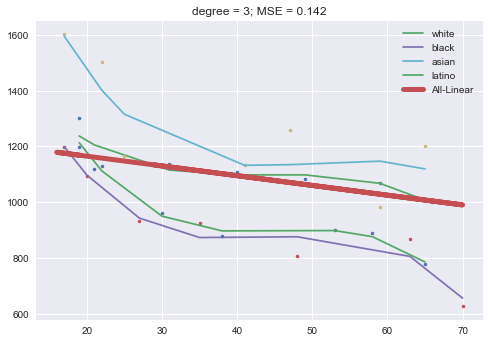

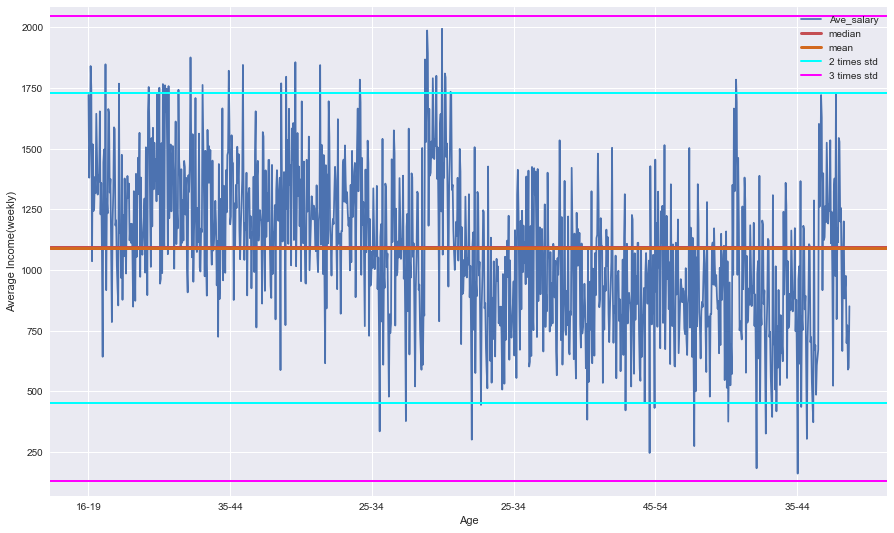

In [15]:
control()